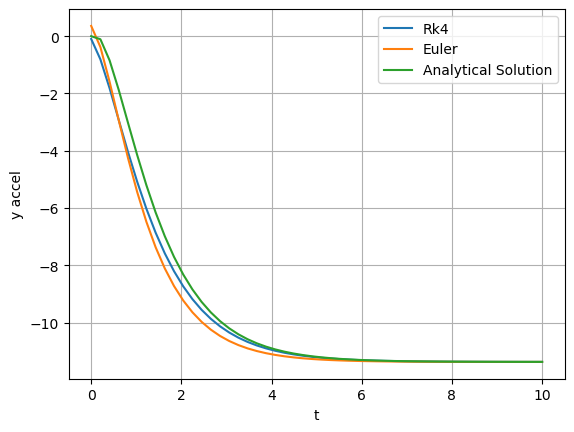

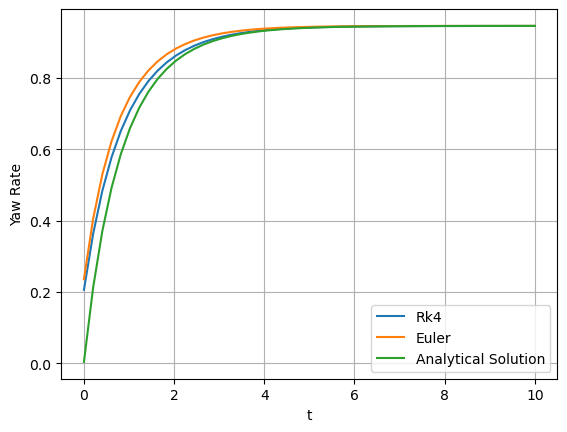

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

class BicycleSolver:
    def __init__(self, m, a, b, C_alpha_f, C_alpha_r, I_z, u):
        self.A = np.array(
            [[-1 * (C_alpha_f + C_alpha_r) / (m * u), (-1 * (a * C_alpha_f - b * C_alpha_r) / (m * u)) - u],
            [-1 * (a * C_alpha_f - b * C_alpha_r) / (I_z * u), -1 * (a**2 * C_alpha_f + b**2 * C_alpha_r) / (I_z * u)]]
        )

        self.B = np.array(
            [[C_alpha_f / m],
            [a*C_alpha_f / I_z]]
        )
    
    def solve(self, iterator, func, init_vector: np.ndarray, init_t, max_iter: int, step_size: float):
        """
        Generalized iterative solver that solves Y' = func using the specified iteration method.
        """
        y = init_vector.copy()
        res = []
        t = init_t
        for i in range(max_iter):
            y = iterator(func, y, t, step_size)
            t += step_size
            res.append(y)
        
        return y, res
    
    @staticmethod
    def eulers_method(func, y_curr: np.ndarray, t, step_size: float) -> np.ndarray:
        """
        Euler's Method for n-dimensional systems.
        
        Args:
            func: F(Y, t). (n, 1) output shape
            y_curr: Y_i. (n, 1) shaped
            step_size: delta t. Scalar

        Returns:
            y_next: Y_i+1. (n, 1) shaped
        """
        y_next = y_curr + step_size * func(y_curr, t)

        return y_next

    @staticmethod
    def rk4(func, y_curr: np.ndarray, t, step_size: float) -> np.ndarray:
        k1: np.ndarray = func(y_curr, t)

        v2: np.ndarray = y_curr + step_size / 2 * k1
        k2: np.ndarray = func(v2, t + step_size / 2)

        v3: np.ndarray = y_curr + step_size / 2 * k2
        k3: np.ndarray = func(v3, t + step_size / 2)

        v4: np.ndarray = y_curr + step_size * k3
        k4: np.ndarray = func(v4, t + step_size)

        return y_curr + step_size / 6 * (k1 + 2*k2 + 2*k3 + k4)
    
    @staticmethod
    def bicycle_model(A, B, y, delta) ->np.ndarray:
        return np.matmul(A, y) + B*delta
    
    @staticmethod
    def target(t):
        """
        Helper Function to test solver. Taken from the project manual, this computes the solution for time t
        using init [0,0] and table parameters.
        """
        return np.array(
            [[-13.0964*np.e**(-1 * 1.9745 * t) + 24.468*np.e**(-1*0.9839*t) - 11.3720],
            [-0.2496*np.e**(-1 * 1.9745 * t) - 0.69262*np.e**(-1*0.9839*t) + 0.9457]]
        )
    
    def visualize_results(self, histories, labels, init_t, t_final, max_iter, title1="", title2 = ""):
        plt.close('all')
        plt.figure()
        for i, hist in enumerate(histories):
            t_values = np.linspace(init_t, t_final, max_iter)
            plt.plot(t_values, [val[0] for val in hist], label=labels[i])

        # Y accel
        plt.xlabel('t')
        plt.ylabel("y accel")
        plt.legend()
        plt.grid()
        plt.title(title1)
        plt.show()

        plt.figure()

        # Yaw Rate
        for i, hist in enumerate(histories):
            t_values = np.linspace(init_t, t_final, max_iter)
            plt.plot(t_values, [val[1] for val in hist], label=labels[i])

        plt.xlabel('t')
        plt.ylabel("Yaw Rate")
        plt.legend()
        plt.grid()
        plt.title(title2)
        plt.show()
    
    def plot_ground_coordinates(self, histories):
        # TODO: Figure out how to do this
        # Looks like its integrating the X*, Y* and state vectors over time tho
        # Pretty annoying
        pass


def const_delta(t):
    return 0.1

init_vector = np.array([[0],[0]])
t_final = 10
init_t = 0
step_size = 0.2
max_iter = int(t_final / step_size)

solver = BicycleSolver(
    m = 1400,
    a = 1.14,
    b = 1.33,
    C_alpha_f = 25000,
    C_alpha_r = 21000,
    I_z = 2420,
    u = 75 * 1000 / 3600
)

def task_a_model(y, t) -> np.ndarray:
    return solver.bicycle_model(solver.A, solver.B, y, const_delta(t))

res, hist = solver.solve(solver.rk4, task_a_model, init_vector, init_t, max_iter, step_size)
res_2, hist_2 = solver.solve(solver.eulers_method, task_a_model, init_vector, init_t, max_iter, step_size)
target_hist = [solver.target(t) for t in np.linspace(init_t, t_final, max_iter)]

solver.visualize_results([hist, hist_2, target_hist], ["Rk4", "Euler", "Analytical Solution"], init_t, t_final, max_iter)

[[-68.19224579]
 [  3.71681698]]
[[-32.76173402]
 [  1.93578204]]
[[-20.09590547]
 [  1.33137045]]
[[-14.43996392]
 [  1.07590302]]
[[-11.37070035]
 [  0.94568334]]
[[-9.45073025]
 [ 0.8699638 ]]
[[-8.12788602]
 [ 0.8219993 ]]


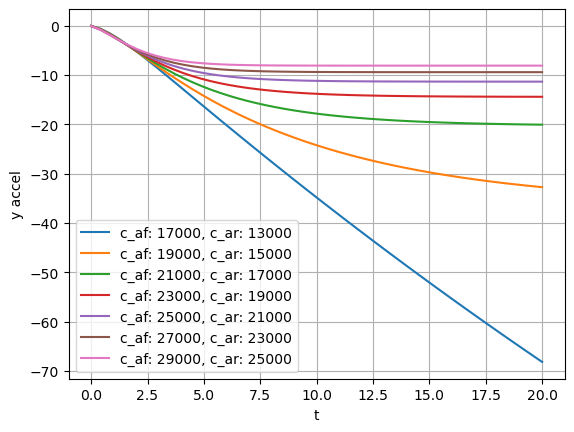

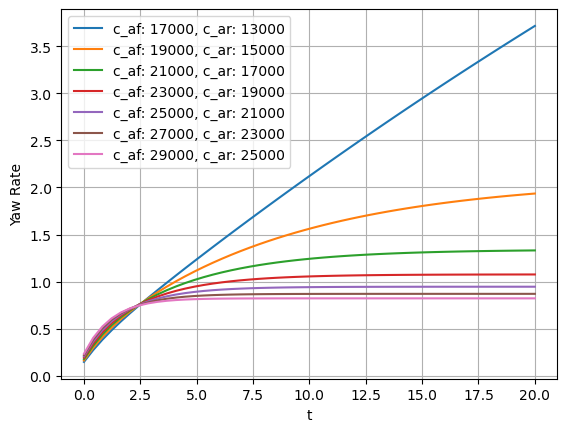

In [4]:
import numpy as np
modified_C_a_f = [17000, 19000, 21000, 23000, 25000, 27000, 29000]
modified_C_a_r = [13000, 15000, 17000, 19000, 21000, 23000, 25000]

"""
1. test both increase
2. test one increase at a time
3. maybe explicitly verify what happens if the cornering rear stiffness is greater than the front
"""

t_final = 20
init_t = 0
step_size = 0.2
histories = []
labels = []

for i in range(len(modified_C_a_f)):
    solver = BicycleSolver(

        m = 1400,
        a = 1.14,
        b = 1.33,
        C_alpha_f = modified_C_a_f[i],
        C_alpha_r = modified_C_a_r[i],
        I_z = 2420,
        u = 75 * 1000 / 3600
    )

    res, hist = solver.solve(solver.rk4, task_a_model, init_vector, init_t, max_iter, step_size)

    histories.append(hist)
    print(hist[-1])

    labels.append(f'c_af: {modified_C_a_f[i]}, c_ar: {modified_C_a_r[i]}')

solver.visualize_results(histories, labels, init_t, t_final, max_iter)

[[-1.92279178]
 [ 0.18996358]]
[[-2.43508987]
 [ 0.23628215]]
[[-3.07669681]
 [ 0.29743687]]
[[-3.87607903]
 [ 0.37868362]]
[[-4.86487987]
 [ 0.486321  ]]


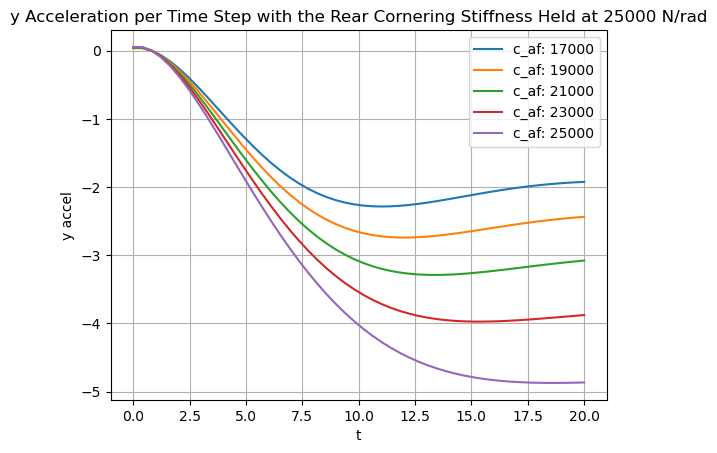

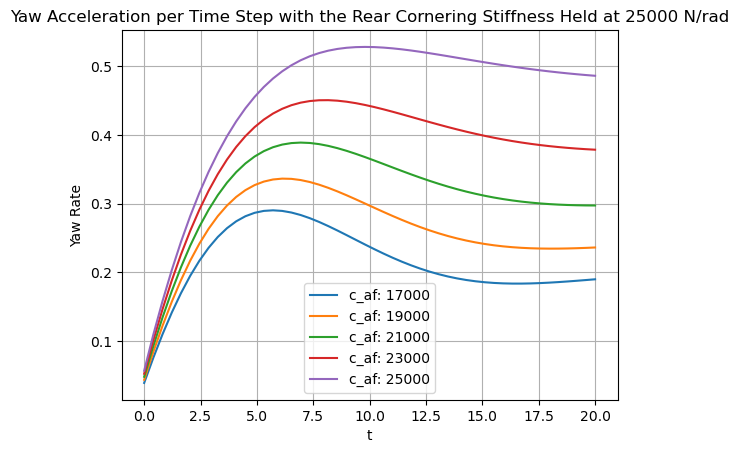

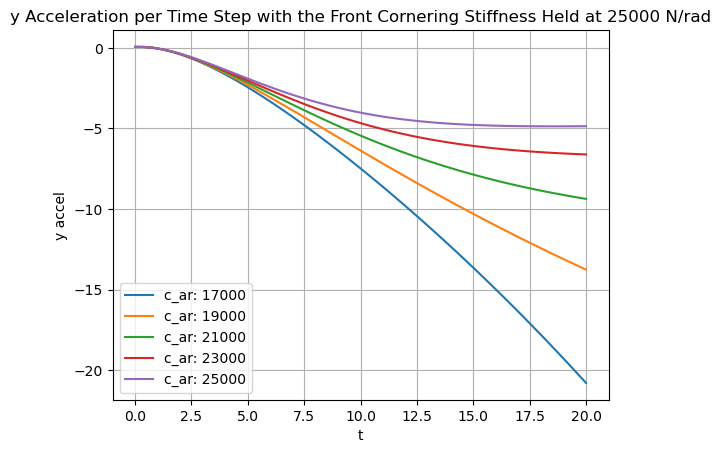

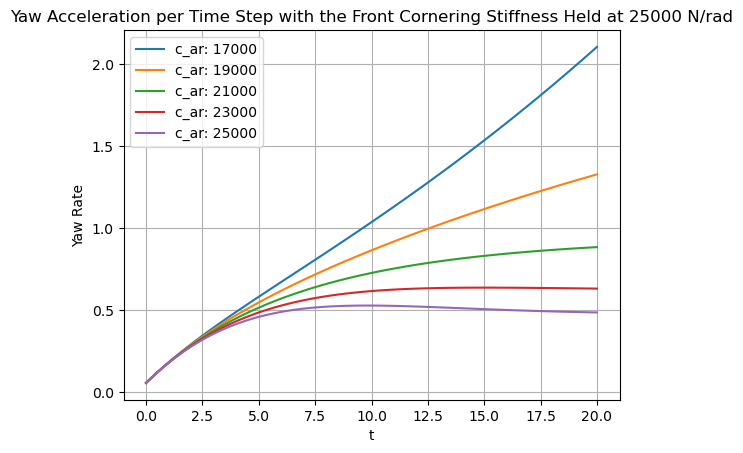

In [5]:
import numpy as np
modified_C_a = [17000, 19000, 21000, 23000, 25000]

"""
1. test both increase
2. test one increase at a time
3. maybe explicitly verify what happens if the cornering rear stiffness is greater than the front
"""

t_final = 20
init_t = 0
step_size = 0.05
histories = []
labels = []

for i in range(len(modified_C_a)):
    solver = BicycleSolver(

        m = 1400,
        a = 1.14,
        b = 1.33,
        C_alpha_f = modified_C_a[i],
        C_alpha_r = 25000,
        I_z = 2420,
        u = 75 * 1000 / 3600
    )

    res, hist = solver.solve(solver.rk4, task_a_model, init_vector, init_t, max_iter, step_size)
    print(hist[-1])

    histories.append(hist)
    labels.append(f'c_af: {modified_C_a[i]}')

solver.visualize_results(histories, labels, init_t, t_final, max_iter, "y Acceleration per Time Step with the Rear Cornering Stiffness Held at 25000 N/rad", "Yaw Acceleration per Time Step with the Rear Cornering Stiffness Held at 25000 N/rad")
histories = []
labels = []
for i in range(len(modified_C_a)):
    solver = BicycleSolver(

        m = 1400,
        a = 1.14,
        b = 1.33,
        C_alpha_f = 25000,
        C_alpha_r = modified_C_a[i],
        I_z = 2420,
        u = 75 * 1000 / 3600
    )

    res, hist = solver.solve(solver.rk4, task_a_model, init_vector, init_t, max_iter, step_size)
    histories.append(hist)
    labels.append(f'c_ar: {modified_C_a[i]}')

solver.visualize_results(histories, labels, init_t, t_final, max_iter, "y Acceleration per Time Step with the Front Cornering Stiffness Held at 25000 N/rad", "Yaw Acceleration per Time Step with the Front Cornering Stiffness Held at 25000 N/rad")

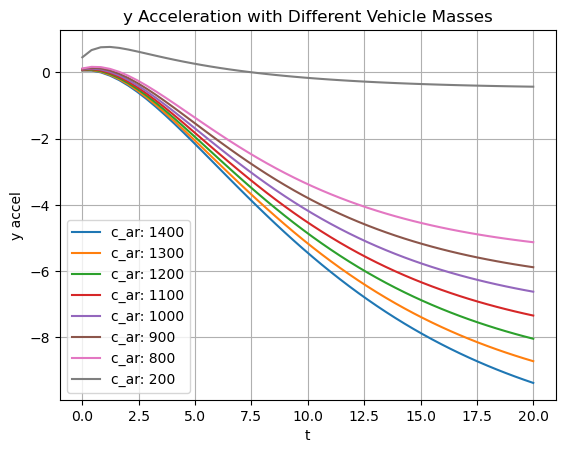

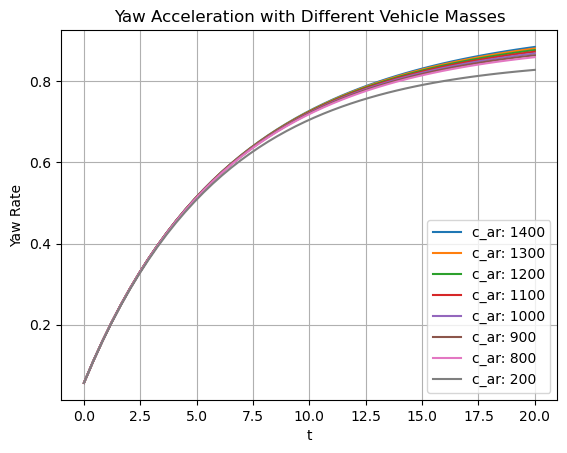

In [6]:
import numpy as np
modified_m = [1400, 1300, 1200, 1100, 1000, 900, 800, 200]

"""
1. test both increase
2. test one increase at a time
3. maybe explicitly verify what happens if the cornering rear stiffness is greater than the front
"""

t_final = 20
init_t = 0
step_size = 0.05
histories = []
labels = []

for i in range(len(modified_m)):
    solver = BicycleSolver(

        m = modified_m[i],
        a = 1.14,
        b = 1.33,
        C_alpha_f = 25000,
        C_alpha_r = 21000,
        I_z = 2420,
        u = 75 * 1000 / 3600
    )

    res, hist = solver.solve(solver.rk4, task_a_model, init_vector, init_t, max_iter, step_size)
    histories.append(hist)
    labels.append(f'c_ar: {modified_m[i]}')

solver.visualize_results(histories, labels, init_t, t_final, max_iter, "y Acceleration with Different Vehicle Masses", "Yaw Acceleration with Different Vehicle Masses")

In [ ]:
import numpy as np
from scipy.optimize import fsolve

def find_cornering_rear(vars, C_alpha_f, m, u, a, b, k):
    C_alpha_r = vars[0] 

    """
    am i stupid
    """
    
    d = -1 * (C_alpha_f + C_alpha_r) / (m * u)  
    e = (-1 * (a * C_alpha_f - b * C_alpha_r) / (m * u)) - u 
    f =-1 * (a * C_alpha_f - b * C_alpha_r) / (k * u) 
    g = -1 * (a**2 * C_alpha_f + b**2 * C_alpha_r) / (k * u)

    lhs = (d + g)**2
    rhs = 4 * (d * g - e*f)
    
    # solve for discriminant = 0
    return lhs - rhs

# Function to find the root (value of y)
def find_y(caf, m, u, a, b, k):
    initial_guess = [25000]
    car = fsolve(find_cornering_rear, initial_guess, args=(caf, m, u, a, b, k))
    
    return car[0]

# Example usage
caf = 1000  # Example value for front cornering stiffness (caf)
m = 1400  # Example value for mass (m)
u = 75/3.6  # Example value for velocity (u)
a = 1.14
b = 1.33
k = 2420
print(k * u)
print(m*u)
y = find_y(caf, m, u, a, b, k)
print("Solution for y:", y)



def find_car(vars, C_alpha_f, car, m, u, a, b, k):
    """
    am i stupid
    """
    
    d = -1 * (C_alpha_f + car) / (m * u)  
    e = (-1 * (a * C_alpha_f - b * car) / (m * u)) - u 
    f =-1 * (a * C_alpha_f - b * car) / (k * u) 
    g = -1 * (a**2 * C_alpha_f + b**2 * car) / (k * u)

    lhs = (d + g)**2
    rhs = 4 * (d * g - e*f)
    
    # solve for discriminant = 0
    return lhs - rhs

print(find_car(vars, caf, 23500, m, u, a, b, k))

50416.666666666664
29166.666666666664


NameError: name 'system_of_equations' is not defined

In [ ]:
import numpy as np
modified_C_a = [y]

"""
1. test both increase
2. test one increase at a time
3. maybe explicitly verify what happens if the cornering rear stiffness is greater than the front
"""

t_final = 20
init_t = 0
step_size = 0.05
histories = []
labels = []

for i in range(len(modified_C_a)):
    solver = BicycleSolver(

        m = 1400,
        a = 1.14,
        b = 1.33,
        C_alpha_f = 1000,
        C_alpha_r = modified_C_a[i],
        I_z = 2420,
        u = 75 * 1000 / 3600
    )

    res, hist = solver.solve(solver.rk4, task_a_model, init_vector, init_t, max_iter, step_size)
    print(hist[-1])

    histories.append(hist)
    labels.append(f'c_ar: {modified_C_a[i]}')

solver.visualize_results(histories, labels, init_t, t_final, max_iter, "y Acceleration with Critical Damping, Over Damping, and Under Damping by Modifying the Rear Cornering Frequency" , "Yaw Acceleration with Aggressively Different Cornering Stiffness for Front (1000 N/rad) and Rear (25000 N/rad) Wheel")